**1. Let's Import the needed Libraries and the Dataset 'Toyota Corolla'**

and store the dataset in the object 'df'

In [ ]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv("ToyotaCorolla1.csv", header=0)
dataframe.head()
np.random.seed(seed = 23)
df = dataframe.values
df = pd.DataFrame(df)
del df[0]
df.columns = ['Price', 'Age', 'KM', 'HP', 'Metcolor', 'Automatic', 'CC', 'Doors', 'Weight', 'Petrol', 'CNG', 'Diesel']
df

,Price,Age,KM,HP,Metcolor,Automatic,CC,Doors,Weight,Petrol,CNG,Diesel
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1,0,1300,3,1025,1,0,0
1432,10845,72,19000,86,0,0,1300,3,1015,1,0,0
1433,8500,71,17016,86,0,0,1300,3,1015,1,0,0
1434,7250,70,16916,86,1,0,1300,3,1015,1,0,0


**2. Next, let's assign the Price Column in the variable Y and the other features in variable X**

In [ ]:
Z = np.array(df)
np.random.shuffle(Z)
X = Z[:,1:12]
Y = Z[:,0]

**3. Now let's do a Train Test Split of our Data**

In [ ]:
X_train = X[0:round(0.9*len(X))]
Y_train = Y[0:round(0.9*len(X))]
X_test = X[len(X_train)-1:-1]
Y_test = Y[len(Y_train)-1:-1]

**Let's Build our Model**

1 Input Layer (11 Inputs) --> 3 Hidden Layers (Every Layer has 12 Neurons.) --> 1 Output Layer (1 Neuron)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='uniform',bias_initializer='ones',activation='relu'))
model.add(Dense(12, input_dim=11, kernel_initializer='uniform',bias_initializer='ones', activation='relu'))
model.add(Dense(12, input_dim=11, kernel_initializer='uniform',bias_initializer='ones', activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',bias_initializer='ones',activation = 'relu'))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(X_train,Y_train,epochs = 10,batch_size = 2)
score = model.evaluate(X_test,Y_test)
predict = model.predict(X_test)
predict_train = model.predict(X_train)
prediction = []
for i in range(len(predict)):
    prediction.append(predict[i][0])
print('Score: %d',np.sqrt(score))

Epoch 1/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 79392392.0000
Epoch 2/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 49988940.0000
Epoch 3/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18459346.0000
Epoch 4/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5412571.0000
Epoch 5/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5422041.0000
Epoch 6/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4967486.5000
Epoch 7/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4987501.0000
Epoch 8/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5156981.0000
Epoch 9/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5258254.5000
Epoch 10/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5366677.5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8869620.0000   
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Score: %d 2708.078100793993


**Plot of Predictions (BLUE) v/s Actual Prices (RED)**

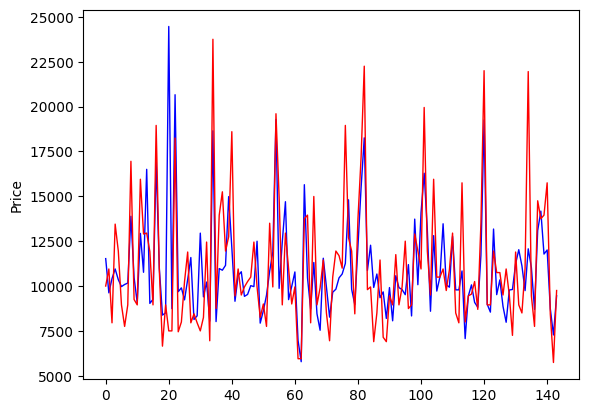

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(prediction,color='blue',lw=1)
plt.plot(Y_test,color = 'red',lw = 1)
plt.ylabel('Price')
plt.show()

**Let's do a Regression Plot of our Model.**

<ipython-input-10-12244f5acf91>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3, color='red')


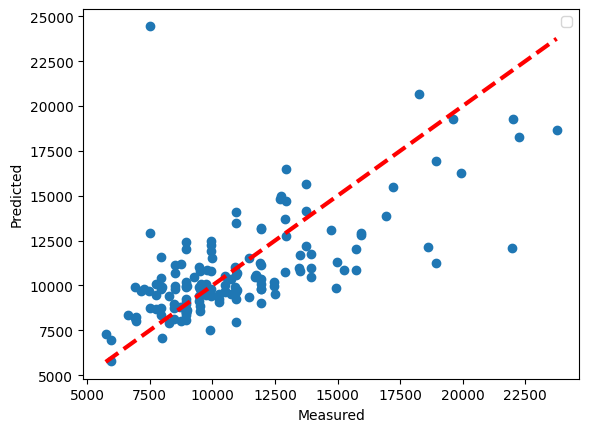

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Y_test,prediction)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3, color='red')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.legend()
plt.show()

**Residuals Plot**

      Predicted  Actual   Difference
0  11527.131836   10000  1527.131836
1   9620.651367   10950  1329.348633
2  10416.034180    7950  2466.034180
3  10950.804688   13450  2499.195312
4  10354.299805   11950  1595.700195


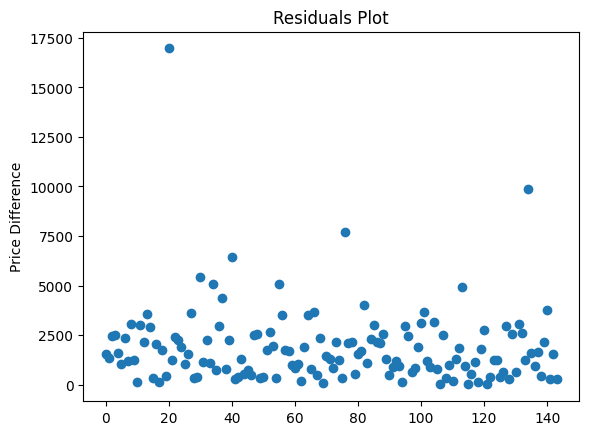

In [ ]:
table = pd.DataFrame()
table[0] = prediction
table[1] = Y_test
table[2] = abs(Y_test - prediction)
table.columns = ['Predicted','Actual','Difference']
print(table.head())
plt.scatter(range(table.shape[0]),table['Difference'])
plt.title('Residuals Plot')
plt.ylabel('Price Difference')
plt.show()

**Let's Calculate the R Squared Value of our Model**

In [ ]:
SS_res= np.sum(table['Difference']**2)
SS_tot = np.sum((Y_test -np.mean(Y_test))**2)
R_2 = abs(1 - (SS_res/SS_tot))
print('The R-Squared Value of our Model : ' + str(R_2))

The R-Squared Value of our Model : 0.40535071832456426
